In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from numpy.linalg import norm

In [ ]:
#load dataset
# do not use zero
df= pd.read_csv('data/ML-CUP23-TR.csv', sep=",", low_memory=False, header = None,  usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], names=[0,1,2,3,4,5,6,7,8,9,10,'x','y','z'], skiprows=range(0, 7))
#df_2= pd.read_csv('data/ML-CUP23-TS.csv', sep=",", low_memory=False, header = None,  usecols=[0,1,2,3,4,5,6,7,8,9,10],  skiprows=range(0, 7))
y_labels=df[['x','y','z']]
features_df = df[[1,2,3,4,5,6,7,8,9,10]]
#test_set=df_2[[1,2,3,4,5,6,7,8,9,10]]

# ADABoost with decision Tree


In [ ]:
training_x, test_x, training_y, test_y = train_test_split(features_df, y_labels, stratify =None, test_size=0.40, random_state = 42, shuffle=False)

In [ ]:
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Randomized search cross validation
**Use RandomizedSearchCV to sample a fixed number of parameter combinations from specified distributions, which can be more efficient.**

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

CPU times: user 5.23 s <br>
Sys: 217 ms <br>
Total: 5.44 s <br>
Wall time: 5min 36s

In [ ]:
%%time
# Initialize base estimator (weaker DecisionTreeClassifier) for AdaBoost
base_estimator_2 = DecisionTreeRegressor(max_depth=8)

# Initialize AdaBoost Classifier
ada_boost_2 = MultiOutputRegressor(AdaBoostRegressor(estimator=base_estimator_2))

# Define the parameter grid
# Note: Prefix 'estimator__' is used to specify parameters for AdaBoostRegressor
param_grid_2 = {
    'estimator__n_estimators': [100, 400, 500, 700, 800],
    'estimator__learning_rate': [0.9, 1, 1.25,1.50,1.75],
    'estimator__estimator__max_depth': [5,10,15,20],  # Parameters for the DecisionTreeRegressor
    'estimator__estimator__min_samples_leaf': [1,10,20],
    'estimator__estimator__min_samples_split': [2,16,32],
    'estimator__estimator__splitter':['best'],
    'estimator__estimator__criterion':['squared_error'],
    'estimator__estimator__random_state' : [42]
}

# Perform grid search
grid_search_2 = GridSearchCV(ada_boost_2, param_grid_2, cv=kf, scoring='neg_mean_squared_error', refit=True, n_jobs=-1,verbose=19)
grid_search_2.fit(training_x, training_y)

# Get the best model and its parameters
best_model_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_
best_score_2 = -grid_search_2.best_score_  # Negate because scores are negative

# Output the best parameters and score
print("Best Parameters:", best_params_2)
print(f"Best Score (MSE): {best_score_2}")

Streaming output truncated to the last 5000 lines.
[CV 1/5; 359/900] END estimator__estimator__criterion=squared_error, estimator__estimator__max_depth=10, estimator__estimator__min_samples_leaf=10, estimator__estimator__min_samples_split=32, estimator__estimator__random_state=42, estimator__estimator__splitter=best, estimator__learning_rate=1, estimator__n_estimators=700;, score=-5.012 total time=   3.4s
[CV 4/5; 360/900] START estimator__estimator__criterion=squared_error, estimator__estimator__max_depth=10, estimator__estimator__min_samples_leaf=10, estimator__estimator__min_samples_split=32, estimator__estimator__random_state=42, estimator__estimator__splitter=best, estimator__learning_rate=1, estimator__n_estimators=800
[CV 4/5; 360/900] END estimator__estimator__criterion=squared_error, estimator__estimator__max_depth=10, estimator__estimator__min_samples_leaf=10, estimator__estimator__min_samples_split=32, estimator__estimator__random_state=42, estimator__estimator__splitter=bes

In [ ]:
%%time
# Initialize base estimator (weaker DecisionTreeClassifier) for AdaBoost
base_estimator_2 = DecisionTreeRegressor(max_depth=8)

# Initialize AdaBoost Classifier
ada_boost_2 = MultiOutputRegressor(AdaBoostRegressor(estimator=base_estimator_2))

# Define the parameter grid
# Note: Prefix 'estimator__' is used to specify parameters for AdaBoostRegressor
param_grid_2 = {
    'estimator__n_estimators': [650, 700,750, 800],
    'estimator__learning_rate': [ 1.25,1.50,1.75],
    'estimator__estimator__max_depth': [10,20,15,20],  # Parameters for the DecisionTreeRegressor
    'estimator__estimator__min_samples_leaf': [1],
    'estimator__estimator__min_samples_split': [2],
    'estimator__estimator__splitter':['best'],
    'estimator__estimator__criterion':['squared_error'],
    'estimator__estimator__random_state' : [42]
}

# Perform grid search
grid_search_2 = GridSearchCV(ada_boost_2, param_grid_2, cv=kf, scoring='neg_mean_squared_error', refit=True, n_jobs=-1,verbose=19)
grid_search_2.fit(training_x, training_y)

# Get the best model and its parameters
best_model_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_
best_score_2 = -grid_search_2.best_score_  # Negate because scores are negative

# Output the best parameters and score
print("Best Parameters:", best_params_2)
print(f"Best Score (MSE): {best_score_2}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'estimator__estimator__criterion': 'squared_error', 'estimator__estimator__max_depth': 15, 'estimator__estimator__min_samples_leaf': 1, 'estimator__estimator__min_samples_split': 2, 'estimator__estimator__random_state': 42, 'estimator__estimator__splitter': 'best', 'estimator__learning_rate': 1.5, 'estimator__n_estimators': 800}
Best Score (MSE): 3.6877715576481735
CPU times: user 4.61 s, sys: 70.1 ms, total: 4.68 s
Wall time: 2min 12s


In [ ]:
%%time
# Initialize base estimator (weaker DecisionTreeClassifier) for AdaBoost
base_estimator_2 = DecisionTreeRegressor(max_depth=8)

# Initialize AdaBoost Classifier
ada_boost_2 = MultiOutputRegressor(AdaBoostRegressor(estimator=base_estimator_2))

# Define the parameter grid
# Note: Prefix 'estimator__' is used to specify parameters for AdaBoostRegressor
param_grid_2 = {
    'estimator__n_estimators': [850,900,950,1000],
    'estimator__learning_rate': [ 1.25,1.50,1.75],
    'estimator__estimator__max_depth': [10,20,15,20],  # Parameters for the DecisionTreeRegressor
    'estimator__estimator__min_samples_leaf': [1],
    'estimator__estimator__min_samples_split': [2],
    'estimator__estimator__splitter':['best'],
    'estimator__estimator__criterion':['squared_error'],
    'estimator__estimator__random_state' : [42]
}

# Perform grid search
grid_search_2 = GridSearchCV(ada_boost_2, param_grid_2, cv=kf, scoring='neg_mean_squared_error', refit=True, n_jobs=-1,verbose=19)
grid_search_2.fit(training_x, training_y)

# Get the best model and its parameters
best_model_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_
best_score_2 = -grid_search_2.best_score_  # Negate because scores are negative

# Output the best parameters and score
print("Best Parameters:", best_params_2)
print(f"Best Score (MSE): {best_score_2}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'estimator__estimator__criterion': 'squared_error', 'estimator__estimator__max_depth': 20, 'estimator__estimator__min_samples_leaf': 1, 'estimator__estimator__min_samples_split': 2, 'estimator__estimator__random_state': 42, 'estimator__estimator__splitter': 'best', 'estimator__learning_rate': 1.25, 'estimator__n_estimators': 950}
Best Score (MSE): 3.6463330356944943
CPU times: user 6.3 s, sys: 74.1 ms, total: 6.37 s
Wall time: 2min 47s


In [ ]:
%%time
# Initialize base estimator (weaker DecisionTreeClassifier) for AdaBoost
base_estimator_2 = DecisionTreeRegressor(max_depth=8)

# Initialize AdaBoost Classifier
ada_boost_2 = MultiOutputRegressor(AdaBoostRegressor(estimator=base_estimator_2))

# Define the parameter grid
# Note: Prefix 'estimator__' is used to specify parameters for AdaBoostRegressor
param_grid_2 = {
    'estimator__n_estimators': [900,950,1000],
    'estimator__learning_rate': [ 1.25,1.50,1.75],
    'estimator__estimator__max_depth': [10,20,15],  # Parameters for the DecisionTreeRegressor
    'estimator__estimator__min_samples_leaf': [1,2,5],
    'estimator__estimator__min_samples_split': [2,4,6],
    'estimator__estimator__splitter':['best'],
    'estimator__estimator__criterion':['squared_error'],
    'estimator__estimator__random_state' : [42]
}

# Perform grid search
grid_search_2 = GridSearchCV(ada_boost_2, param_grid_2, cv=kf, scoring='neg_mean_squared_error', refit=True, n_jobs=-1,verbose=19)
grid_search_2.fit(training_x, training_y)

# Get the best model and its parameters
best_model_2 = grid_search_2.best_estimator_
best_params_2 = grid_search_2.best_params_
best_score_2 = -grid_search_2.best_score_  # Negate because scores are negative

# Output the best parameters and score
print("Best Parameters:", best_params_2)
print(f"Best Score (MSE): {best_score_2}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 2/5; 2/243] START estimator__estimator__criterion=squared_error, estimator__estimator__max_depth=10, estimator__estimator__min_samples_leaf=1, estimator__estimator__min_samples_split=2, estimator__estimator__random_state=42, estimator__estimator__splitter=best, estimator__learning_rate=1.25, estimator__n_estimators=950
[CV 2/5; 2/243] END estimator__estimator__criterion=squared_error, estimator__estimator__max_depth=10, estimator__estimator__min_samples_leaf=1, estimator__estimator__min_samples_split=2, estimator__estimator__random_state=42, estimator__estimator__splitter=best, estimator__learning_rate=1.25, estimator__n_estimators=950;, score=-4.017 total time=   6.5s
[CV 3/5; 3/243] START estimator__estimator__criterion=squared_error, estimator__estimator__max_depth=10, estimator__estimator__min_samples_leaf=1, estimator__estimator__min_samples_split=2, estimator__estimator__random_state=42, estimator__estimator__spl

CPU times: user 18.8 s <br>
Sys: 130 ms <br>
Total: 18.9 s <br>
Wall time: 19.1 s

In [ ]:
%%time
def mean_euclidean_error(y_true, y_pred):
    return np.mean(norm(y_true - y_pred, axis=1))
training_mse_scores = []
validation_mse_scores = []
training_mee_scores = []
validation_mee_scores = []


data_X = training_x
data_y = training_y
# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(data_X):
    X_train_fold, X_val_fold = data_X.iloc[train_index], data_X.iloc[val_index]
    y_train_fold, y_val_fold = data_y.iloc[train_index], data_y.iloc[val_index]

    #train_x_scaled = scaler.fit_transform(X_train_fold)
    #val_scaled = scaler.transform(X_val_fold)#only transform, prevent leakage, use mean and std of training

    model = MultiOutputRegressor(
        AdaBoostRegressor(
            estimator=DecisionTreeRegressor(
                criterion = 'squared_error',
                max_depth=20,
                min_samples_leaf= 2,
                min_samples_split= 4,
                splitter = 'best'
              ),
            random_state=42,
            learning_rate = 1.5,
            n_estimators= 950
        ))

    model.fit(X_train_fold,y_train_fold)
    train_pred = model.predict(X_train_fold)
    val_pred = model.predict(X_val_fold)

    train_mse = mean_squared_error(y_train_fold, train_pred)
    val_mse = mean_squared_error(y_val_fold, val_pred)
    train_mee = mean_euclidean_error(y_train_fold, train_pred)
    val_mee = mean_euclidean_error(y_val_fold, val_pred)

    training_mse_scores.append(train_mse)
    validation_mse_scores.append(val_mse)
    training_mee_scores.append(train_mee)
    validation_mee_scores.append(val_mee)

avg_train_mse = np.mean(training_mse_scores)
std_train_mse = np.std(training_mse_scores)
avg_val_mse = np.mean(validation_mse_scores)
std_val_mse = np.std(validation_mse_scores)
avg_train_mee = np.mean(training_mee_scores)
std_train_mee = np.std(training_mee_scores)
avg_val_mee = np.mean(validation_mee_scores)
std_val_mee = np.std(validation_mee_scores)

print(f"Training average 5Fold MSE: {avg_train_mse:.4f} stdev: {std_train_mse:.4f}")
print(f"Validation average 5Fold MSE: {avg_val_mse:.4f} stdev: {std_val_mse:.4f}")
print(f"Training average 5Fold MEE: {avg_train_mee:.4f} stdev: {std_train_mee:.4f}")
print(f"Validation average 5Fold MEE: {avg_val_mee:.4f} stdev: {std_val_mee:.4f}")

Training average 5Fold MSE: 0.1402 stdev: 0.0109
Validation average 5Fold MSE: 3.6519 stdev: 0.8107
Training average 5Fold MEE: 0.5249 stdev: 0.0247
Validation average 5Fold MEE: 2.4947 stdev: 0.1959
CPU times: user 23.7 s, sys: 171 ms, total: 23.9 s
Wall time: 24.5 s


In [ ]:
%%time
best_model = MultiOutputRegressor(AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=15), random_state=42, learning_rate = 1.5, n_estimators= 800))
best_model.fit(training_x,training_y)

CPU times: user 4.24 s, sys: 23.2 ms, total: 4.26 s
Wall time: 4.29 s


MultiOutputRegressor(estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=15),
                                                 learning_rate=1.5,
                                                 n_estimators=800,
                                                 random_state=42))

In [ ]:
# Predict labels for the training set
train_labels_pred = best_model.predict(training_x)

# Predict labels for the test set
test_labels_pred = best_model.predict(test_x)

# Calculate MSE for the training set
train_mse = mean_squared_error(training_y, train_labels_pred)
print(f"Training MSE: {train_mse}")

# Calculate MSE for the test set
test_mse = mean_squared_error(test_y, test_labels_pred)
print(f"Test MSE: {test_mse}")

# Define a function to calculate the Mean Euclidean Error
def mean_euclidean_error(y_true, y_pred):
    return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

# Calculate MEE for the training set
train_mee = mean_euclidean_error(training_y, train_labels_pred)
print(f"Training MEE: {train_mee}")

# Calculate MEE for the test set
test_mee = mean_euclidean_error(test_y, test_labels_pred)
print(f"Test MEE: {test_mee}")


Training MSE: 0.07308008552142485
Test MSE: 3.3861568022522275
Training MEE: 0.2968388879466386
Test MEE: 2.3928698492423863


Text(0, 0.5, 'Predicted Values')

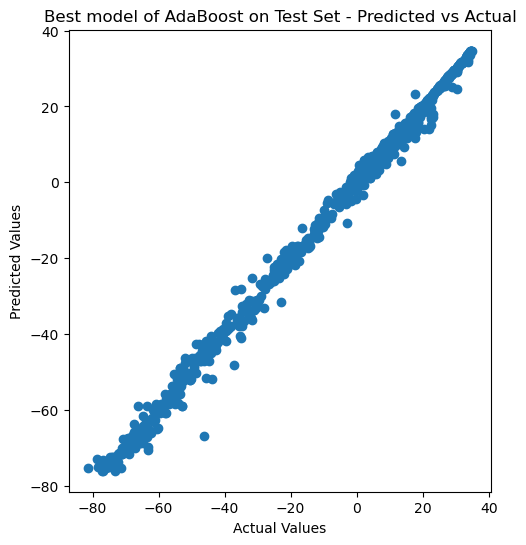

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(test_y, test_labels_pred)
plt.title("Best model of AdaBoost on Test Set - Predicted vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")